In [5]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [6]:
import joblib

In [7]:
stock = yf.Ticker("AAPL")
stock = stock.history(period='2y')


In [8]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,0.0,0.0
2022-08-09 00:00:00-04:00,162.410382,164.192721,161.647935,163.301544,63135500,0.0,0.0
2022-08-10 00:00:00-04:00,166.034459,167.678172,165.262115,167.579163,70170500,0.0,0.0
2022-08-11 00:00:00-04:00,168.391071,169.311952,166.539428,166.836487,57149200,0.0,0.0
2022-08-12 00:00:00-04:00,168.153448,170.480377,167.737557,170.411072,68039400,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,0.0,0.0
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,0.0,0.0
2024-08-02 00:00:00-04:00,219.149994,225.600006,217.710007,219.860001,105568600,0.0,0.0


In [9]:
del stock['Dividends']
del stock['Stock Splits']

In [10]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900
2022-08-09 00:00:00-04:00,162.410382,164.192721,161.647935,163.301544,63135500
2022-08-10 00:00:00-04:00,166.034459,167.678172,165.262115,167.579163,70170500
2022-08-11 00:00:00-04:00,168.391071,169.311952,166.539428,166.836487,57149200
2022-08-12 00:00:00-04:00,168.153448,170.480377,167.737557,170.411072,68039400
...,...,...,...,...,...
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000
2024-08-02 00:00:00-04:00,219.149994,225.600006,217.710007,219.860001,105568600


<AxesSubplot:xlabel='Date'>

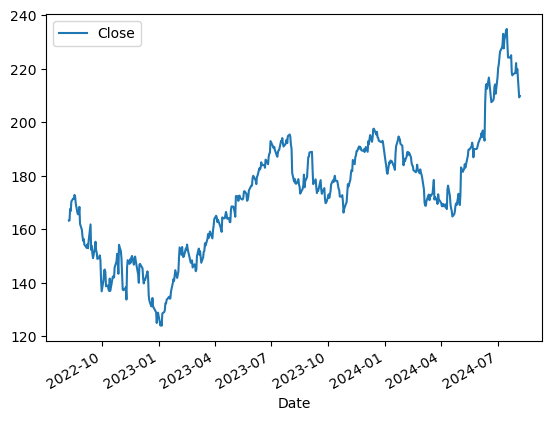

In [11]:
stock.plot.line(y="Close")

In [12]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [13]:
stock

,Open,High,Low,Close,Volume,Next Days Close
Date,,,,,,
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,163.301544
2022-08-09 00:00:00-04:00,162.410382,164.192721,161.647935,163.301544,63135500,167.579163
2022-08-10 00:00:00-04:00,166.034459,167.678172,165.262115,167.579163,70170500,166.836487
2022-08-11 00:00:00-04:00,168.391071,169.311952,166.539428,166.836487,57149200,170.411072
2022-08-12 00:00:00-04:00,168.153448,170.480377,167.737557,170.411072,68039400,171.490372
...,...,...,...,...,...,...
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,218.360001
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,219.860001
2024-08-02 00:00:00-04:00,219.149994,225.600006,217.710007,219.860001,105568600,209.270004


In [14]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

In [15]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,163.301544,1
2022-08-09 00:00:00-04:00,162.410382,164.192721,161.647935,163.301544,63135500,167.579163,1
2022-08-10 00:00:00-04:00,166.034459,167.678172,165.262115,167.579163,70170500,166.836487,0
2022-08-11 00:00:00-04:00,168.391071,169.311952,166.539428,166.836487,57149200,170.411072,1
2022-08-12 00:00:00-04:00,168.153448,170.480377,167.737557,170.411072,68039400,171.490372,1
...,...,...,...,...,...,...,...
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,218.360001,0
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,219.860001,1
2024-08-02 00:00:00-04:00,219.149994,225.600006,217.710007,219.860001,105568600,209.270004,0


In [16]:
import numpy as np
def look_back_period(X, y, look_back_window=20):
    X_lstm, y_lstm, = [],[]
    for i in range(len(X)- look_back_window):
        X_lstm.append(X[i:i+look_back_window])
        y_lstm.append(y[i+look_back_window])
    return np.array(X_lstm), np.array(y_lstm)


In [17]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])
stock = stock.drop(columns = "Next Days Close")

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [18]:
# import numpy as np
# def look_back_period(X, y, look_back_window=20):
#     X_lstm, y_lstm, = [],[]
#     for i in range(len(X)- look_back_window):
#         X_lstm.append(X[i: - look_back_window])
#         y_lstm.append(y[i+look_back_window])
#     return np.array(X_lstm), np.array(y_lstm)


In [19]:
# Normalize data:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
joblib.dump(scaler,"s_scaler.pkl")

['s_scaler.pkl']

In [25]:
import joblib
import tensorflow.keras as k

In [26]:
scaler = joblib.load("s_scaler.pkl")
model  = k.models.load_model("stock_predictor.keras")

In [31]:
symbol = "NVDA"
data = yf.download("NVDA")

[*********************100%%**********************]  1 of 1 completed


In [32]:
del data["Adj Close"]
input = data[-20:]


In [36]:
input_reshaped = scaled_input.reshape(1,20,5)


In [46]:
str(np.ravel(np.argmax(model.predict(input_reshaped)))[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'0'

In [39]:
np.argmax(pred)

0

In [15]:
X_scaled, y = look_back_period(X_scaled, y)

/var/folders/76/jb4rsfs93334vqf862rsx8jh0000gn/T/ipykernel_15580/441879995.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_lstm.append(y[i+look_back_window])


In [16]:
X_scaled.shape, y.shape

((481, 20, 5), (481,))

In [17]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
#X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [18]:
# Define the model
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
#    tf.keras.layers.Dense(32, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
#])

In [19]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [20]:
X_train.shape

(384, 20, 5)

In [21]:
model = Sequential()

model.add(LSTM(units=50, activation="tanh", return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))

model.add(LSTM(units=30,return_sequences=True, activation="tanh",))
model.add(Dropout(0.2))

model.add(LSTM(units=10, activation="tanh"))

model.add(Dense(1, activation="sigmoid"))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=10)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5337 - loss: 0.6985 - val_accuracy: 0.5195 - val_loss: 0.6884
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5881 - loss: 0.6840 - val_accuracy: 0.4156 - val_loss: 0.7060
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5424 - loss: 0.6923 - val_accuracy: 0.4156 - val_loss: 0.7192
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5228 - loss: 0.6934 - val_accuracy: 0.4156 - val_loss: 0.7170
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5183 - loss: 0.6896 - val_accuracy: 0.4156 - val_loss: 0.7071
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5658 - loss: 0.6848 - val_accuracy: 0.4156 - val_loss: 0.7258
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5335 - loss: 0.6896 - val_accuracy: 0.4156 - val_loss: 0.7174
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5100 - loss: 0.6900 - val_accuracy: 0.4156 - 

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5954 - loss: 1.0476
Test Loss: 0.9531129002571106, Test Accuracy: 0.5979381203651428


In [25]:
# Make predictions
predictions = model.predict(X_test).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [26]:
# Create a DataFrame for predictions with the index of X_test_df
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

In [27]:
precision_score(y_test,predictions)

0.6981132075471698

In [28]:

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
num_epochs = 200
x_axis = [i for i in range(num_epochs)]


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [30]:
def analysis_plot(x,train_data, val_data):
    plt.figure(figsize=(12,6))
    plt.plot(x,train_data,label = "train data")
    plt.plot(x,val_data, label = "val data")
    plt.legend()
    plt.plot();

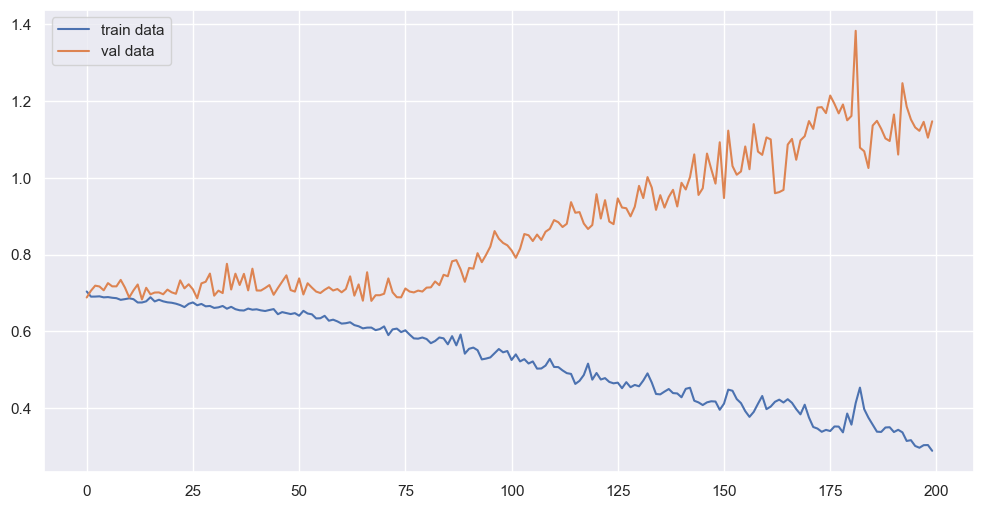

In [31]:
analysis_plot(x=x_axis,train_data = train_loss, val_data=val_loss)

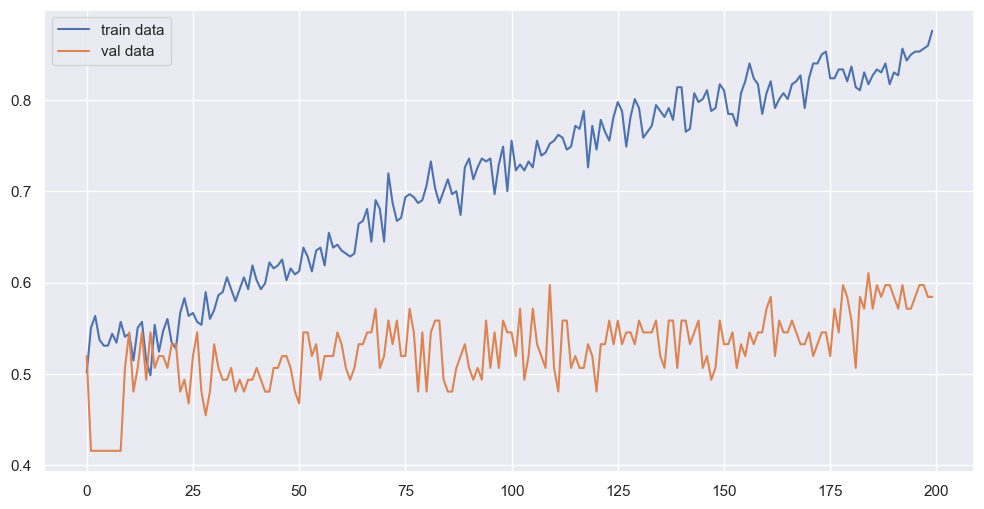

In [32]:
analysis_plot(x=x_axis,train_data = train_acc, val_data = val_acc)

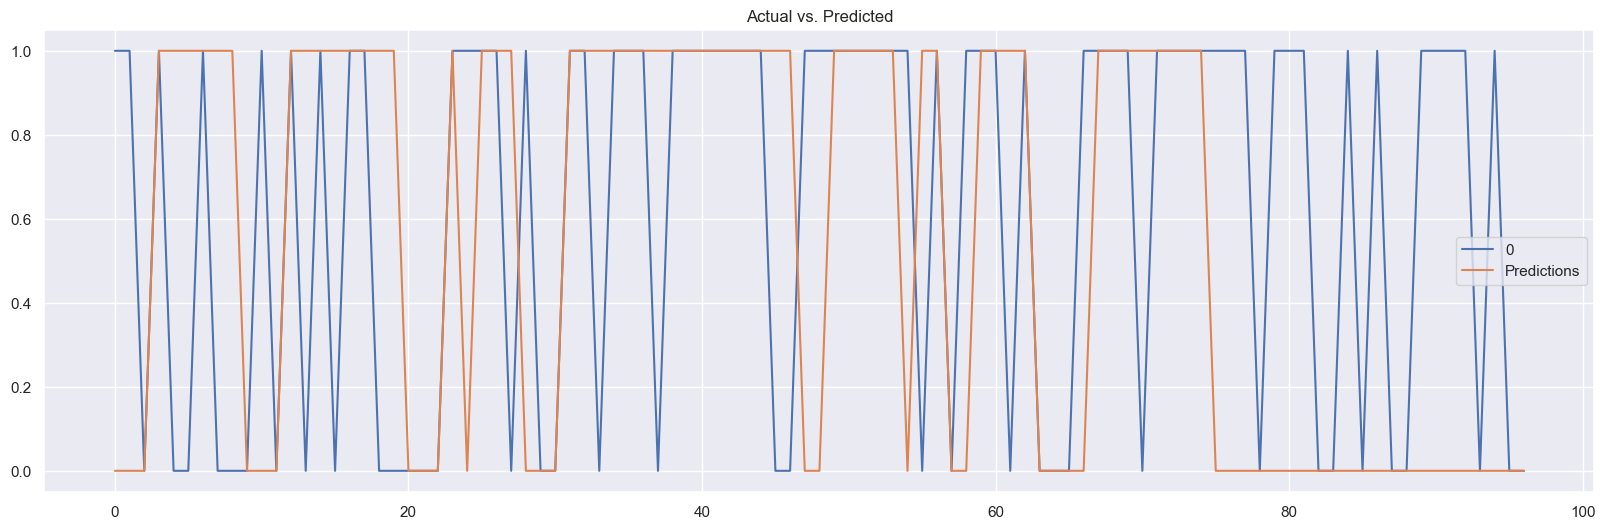

In [33]:
# Combine actual values and predictions
combined = pd.concat([pd.Series(y_test), predictions_df], axis=1)

# Plot the combined DataFrame
# plt.figure(figsize = (20,6))
combined.plot(title='Actual vs. Predicted', figsize=(20,6))
# plt.figure(figsize=(20,6))
plt.show()

$$ y_{hat} = f(x_{faetures})$$

In [34]:
combined.columns

Index([0, 'Predictions'], dtype='object')

In [35]:
# plt.scatter(combined[0], combined.Predictions)

In [36]:
predictions_df

,Predictions
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
92,0.0
93,0.0
94,0.0
95,0.0


In [37]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [39]:
# Prepare latest data for prediction
latest_data = X_scaled[-1]  # Take the most recent row
latest_data_df = pd.DataFrame(latest_data, columns  = X.columns)

In [40]:
latest_data_df

,Open,High,Low,Close,Volume
0,2.436240,2.394637,2.339011,2.466758,-0.265332
1,2.473629,2.463677,2.478074,2.505093,-0.712642
2,2.534610,2.627595,2.606439,2.696771,-0.121435
3,2.627639,2.596861,2.451331,2.455614,-0.036810
4,2.517696,2.607996,2.581033,2.588005,-0.510703
5,2.854201,2.812448,2.777593,2.760069,-0.121289
6,2.788325,2.769687,2.743719,2.778792,-0.909356
7,2.541287,2.555436,2.490108,2.514009,-0.336026
8,2.578231,2.510002,2.295332,2.304500,0.016982
9,2.335200,2.347866,2.340348,2.310296,-0.668950


In [45]:
latest_data = latest_data.reshape(1,20,5)

In [46]:
# Make prediction for the next day
next_day_prediction = model.predict(latest_data)
print(f'Prediction for the next day: {"Stock Will Go Up" if next_day_prediction == 1 else "Stock Will Go Down"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction for the next day: Stock Will Go Down


[*********************100%%**********************]  10 of 10 completed


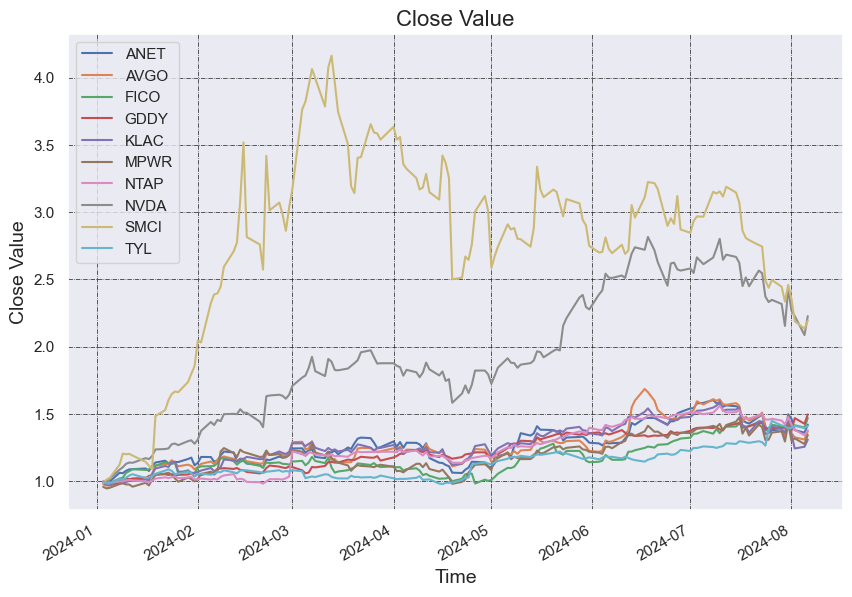

In [53]:
# Define the ticker list
import pandas as pd
tickers_list = ['SMCI', 'NVDA', 'ANET', 'NTAP', 'AVGO', 'KLAC', 'FICO', 'GDDY', 'MPWR', 'TYL']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2024-1-1')['Close']
WealthIndex =(1+ (data.pct_change()).dropna()).cumprod()
# Plot all the close prices
((WealthIndex.plot(figsize=(10, 7))))
plt.legend()
plt.title("Close Value", fontsize=16)

# Define the labels
plt.ylabel('Close Value', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#plt.yscale("log")
plt.show()

In [54]:
# Prepare latest data for prediction
look_back_window = 20  # Ensure this matches our function parameter
latest_data = X_scaled[-1].reshape(1, look_back_window, X_scaled.shape[2])
latest_data_df = pd.DataFrame(latest_data[0], columns=X.columns)
print(latest_data_df)

# Prepare latest data for prediction
latest_data = stock.drop(columns=['change']).iloc[-look_back_window:]  # Get the last look_back_window rows
latest_data_scaled = scaler.transform(latest_data)  # Scale the data
latest_data_reshaped = latest_data_scaled.reshape(1, look_back_window, latest_data_scaled.shape[1])  # Reshape to (1, look_back_window, num_features)

# Make prediction for the next day
next_day_prediction = model.predict(latest_data_reshaped).round().flatten()[0]
# Interpret the prediction
if next_day_prediction == 1:
    print("The model predicts that the stock price will increase the next day.")
else:
    print("The model predicts that the stock price will decrease the next day.")

        Open      High       Low     Close    Volume
0   2.436240  2.394637  2.339011  2.466758 -0.265332
1   2.473629  2.463677  2.478074  2.505093 -0.712642
2   2.534610  2.627595  2.606439  2.696771 -0.121435
3   2.627639  2.596861  2.451331  2.455614 -0.036810
4   2.517696  2.607996  2.581033  2.588005 -0.510703
5   2.854201  2.812448  2.777593  2.760069 -0.121289
6   2.788325  2.769687  2.743719  2.778792 -0.909356
7   2.541287  2.555436  2.490108  2.514009 -0.336026
8   2.578231  2.510002  2.295332  2.304500  0.016982
9   2.335200  2.347866  2.340348  2.310296 -0.668950
10  2.432679  2.391518  2.331880  2.294694 -0.707535
11  2.315169  2.354102  2.313605  2.341499 -1.042373
12  2.298700  2.258781  2.066235  2.053091 -0.155973
13  2.073028  2.082837  1.954361  2.006286 -0.577955
14  2.062790  2.022259  2.016315  2.027237 -0.975702
15  1.985341  2.013795  2.004726  2.039719 -1.190606
16  2.084601  2.059675  2.021218  2.064681 -0.973975
17  2.184751  2.215129  2.222235  2.210891 -0.

In [55]:
model.save("stock_predictor.keras")